In [25]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
import pprint
from numpy.linalg import matrix_rank
from scipy import signal
import cvxpy

## Projected Subgradient

In [26]:
def l1_threshold(x, k):
    idxs = np.argpartition(np.abs(x), -k)[:-k]
    x[idxs] = 0
    return x

def run_projected_subgradient(A, y, x0, iters=10000, verbose=True):
    m, n = A.shape
    k = np.count_nonzero(x0)
    A_pseudo = A.T.dot(np.linalg.inv(A.dot(A.T)))
    gamma = np.eye(n) - A_pseudo.dot(A)
    x_hat = A_pseudo.dot(y)
    x = np.zeros(n)
    for i in range(iters):
        t = i+1
        x = x_hat + gamma.dot(x - (np.sign(x)/t)) 
        x = l1_threshold(x, k)
        error = np.linalg.norm(x - x0)
        if t%1000 == 0:
            if verbose:
                print('[%d, %5d] loss: %.6f' % (t, iters, error))
    return error

In [27]:
n = 50
step = 5
runs_per = 5
error_thresh = 1e-3

deltas = []
etas = []
successes = []

for m in range(0, n+1, step):
    print("m:", m)
    for k in reversed(range(0, n+1, step)):
        delta = m/float(n)
        eta = k/float(n)
        num_successes = 0
        for i in range(runs_per):
            A = np.random.randn(m, n)/(n**0.5) 
            pos_idxs = np.random.choice(n, k, replace=False)
            x0 = np.zeros(n)
            x0[pos_idxs] = np.random.randn(k)
            y = A.dot(x0)
            error = run_projected_subgradient(A, y, x0, verbose=False)
            num_successes += 1 if error<error_thresh else 0
        deltas.append(delta)
        etas.append(eta)
        successes.append(num_successes/float(runs_per))

m: 0
m: 5
m: 10
m: 15
m: 20
m: 25
m: 30
m: 35
m: 40
m: 45
m: 50


Text(0,0.5,'Fraction of Nonzero Entries: k/n')

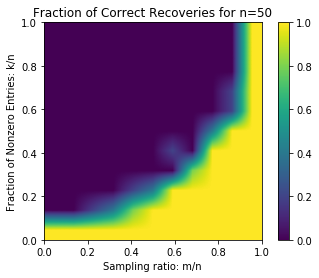

In [28]:
successes = np.array(successes)
deltas = np.array(deltas)
etas = np.array(etas)
heatmap = successes.reshape((n//step)+1, (n//step)+1)
plt.title("Fraction of Correct Recoveries for n=50")
plt.imshow(heatmap, interpolation='bilinear', extent=[np.amin(deltas),np.amax(deltas),np.amin(etas),np.amax(etas)])
plt.xlabel("Sampling ratio: m/n")
plt.colorbar()
plt.ylabel("Fraction of Nonzero Entries: k/n")

## 5.2 Phase Transition in Sparse Recovery with Gaussian Matrices

I ran experiments with n=50 and varied m and k with respect to n=50 in intervals of 5. For each combination of (m, k), I ran 5 experiments and averaged the success over those trials, resulting in the interpolated phase diagram above. We see that it mirrors that of Figure 3.15 where the top left region is especially hard and bottom right is easiest recovery.

## 5.1 

I ran a few different combinations of m, k, and n, printing success rate of recovery averaged over 10 trials per combination. When the x0 vector is sparsest (i.e. k is low) and when m/n is greater, we observe the highest success of recovery.

In [22]:
m = 24
n = 48
k = m/4
trials = 10
num_successes = 0
for _ in range(trials):
    A = np.random.randn(m, n)/(n**0.5) 
    pos_idxs = np.random.choice(n, k, replace=False)
    x0 = np.zeros(n)
    x0[pos_idxs] = np.random.randn(k)
    y = A.dot(x0)
    error = run_projected_subgradient(A, y, x0, iters=70000, verbose=False)
    num_successes += 1 if error < 1e-3 else 0
print(num_successes/float(trials))

0.7


In [23]:
m = 24
n = 48
k = m/2
trials = 10
num_successes = 0
for _ in range(trials):
    A = np.random.randn(m, n)/(n**0.5) 
    pos_idxs = np.random.choice(n, k, replace=False)
    x0 = np.zeros(n)
    x0[pos_idxs] = np.random.randn(k)
    y = A.dot(x0)
    error = run_projected_subgradient(A, y, x0, iters=70000, verbose=False)
    num_successes += 1 if error < 1e-3 else 0
print(num_successes/float(trials))

0.1


In [24]:
m = 16
n = 48
k = m/4
trials = 10
num_successes = 0
for _ in range(trials):
    A = np.random.randn(m, n)/(n**0.5) 
    pos_idxs = np.random.choice(n, k, replace=False)
    x0 = np.zeros(n)
    x0[pos_idxs] = np.random.randn(k)
    y = A.dot(x0)
    error = run_projected_subgradient(A, y, x0, iters=70000, verbose=False)
    num_successes += 1 if error < 1e-3 else 0
print(num_successes/float(trials))

0.4
